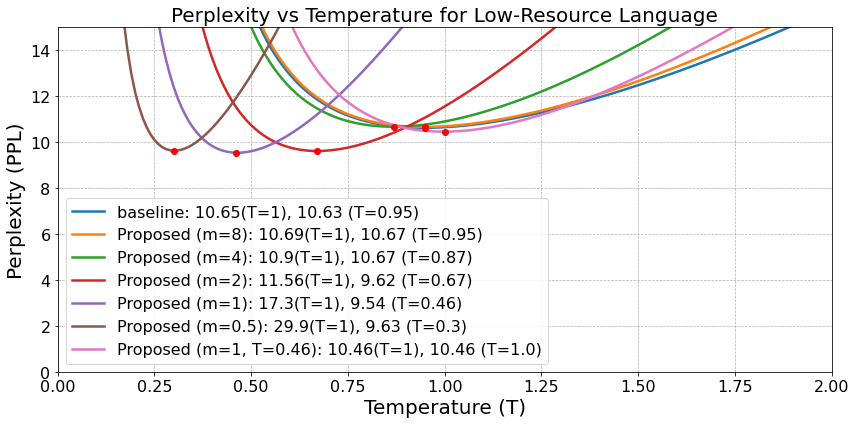

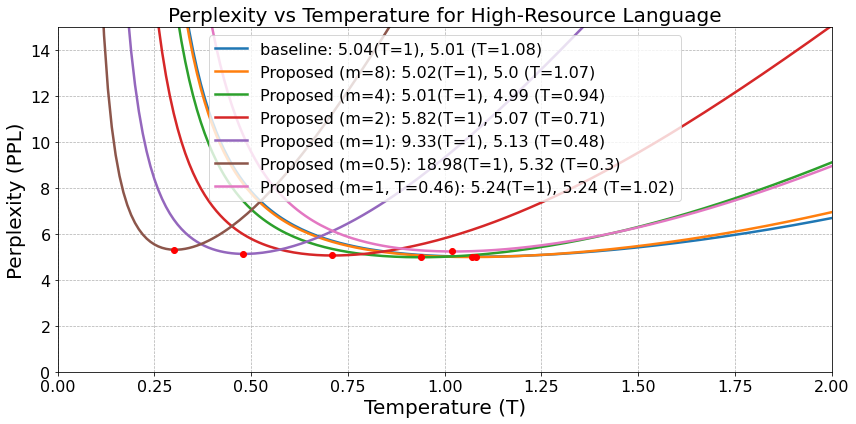

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch

Ts = np.array([i/100 for i in range(1, 201)])

model_names_formatted = {
    'baseline': 'baseline',
#     'slo': 'LRLO',
#     'cosreg_1': "CosReg (gamma=1)",
#     'agg_0.02_1600': 'AGG (alpha=0.02, K=1600)',
#     'agg_0.2_1600': 'AGG (alpha=0.2, K=1600)',
#     'adv_0.05': 'Adv (alpha=0.05)',
    'proposed_margin_8': 'Proposed (m=8)',
    'proposed_margin_4': 'Proposed (m=4)',
    'proposed_margin_2': 'Proposed (m=2)',
    'proposed_margin_1': 'Proposed (m=1)',
    'proposed_margin_0.5': 'Proposed (m=0.5)',
    'proposed_margin_1_0.46': 'Proposed (m=1, T=0.46)',
}

for lang in ['small', 'big']:
    plt.figure(figsize=(12, 6))  # Increase the width to 12
    for model_name in model_names_formatted:
        out_dir = f'nanoGPT/out/{model_name}'
        ppls_path = os.path.join(out_dir, 'ppls.pth')
        ppl = torch.load(ppls_path, weights_only=False)[lang]
        am = ppl.argmin()

        plt.plot(Ts, ppl, 
                 label=f'{model_names_formatted[model_name]}: {round(ppl[99], 2)}(T=1), {round(ppl[am], 2)} (T={round(Ts[am], 2)})',
                 linewidth=2.5)
        plt.scatter(Ts[am], ppl[am], color='red', zorder=5)

    # Move the legend outside the plot
    plt.legend(fontsize=16) #, loc='center left', bbox_to_anchor=(1, 0.5))  # Position it outside to the right
    plt.ylim((0, 15))
    plt.xlim((0, 2))
    lang_names = {
        'big': "High-Resource",
        'small': "Low-Resource"
    }
    plt.title(f'Perplexity vs Temperature for {lang_names[lang]} Language', fontsize=20)
    plt.xlabel('Temperature (T)', fontsize=20)
    plt.ylabel('Perplexity (PPL)', fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True, which='both', linestyle='--', linewidth=0.7)
    
    plt.tight_layout()
    plt.savefig(f'assets/PPL_by_T_{lang}.pdf', bbox_inches='tight')  # Ensure the layout is properly saved
    plt.show()
